# Problem Statement

In a competitive market like the restaurant industry, understanding the factors that influencer business success is crucial for stakeholder. Utilizing the Yelp dataset, this project aims to investigate the relationship betwenn user engagement (reviews, tips, and check-ins) and business success metrics (review countm ratings) for restaurants.

# Research Objectives
*1. Quantify the correlation between user engagement(reviews, tips, check-ins) and reviews count/average star rating:* This will help us determine if restaurants with higher user engagement experience a corresponding increase in reviews and ratings

*2. Analyze the impact od sentiment on reviews count and average star rating:*  We will investigate if positive sentiment in reviews and tips translates to higher star ratings and potentially influences the total number of reviews left.

*3. Time trends in user engagment:* We will explore if consistent user engagment over time is a stonger indicator of long term success compared to sporadic bursts of activity

# Hypothesis Testing
* Higher levels of user engagement (more reviews, tips, and check-ins) correlate with higher review counts and ratings for restaurants.*

* Positive sentiment expressed in reviews and tips contributes to higher overall ratings and review counts for restaurants.*

* Consistent engagement over time is positively associated with sustained business success for restaurants*

### Importing Libraries

In [1]:
import opendatasets as od
import pandas as pd
import numpy as np
import sqlite3
import json
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import warnings
from datetime import datetime
from geopy.geocoders import Nominatim
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import display
warnings.filterwarnings('ignore')

## DataBase Connection

In [2]:
conn = sqlite3.connect('yelp.db')

In [3]:
tables = pd.read_sql_query("select name from sqlite_master where type = 'table'", con=conn)
tables

,name
0,business
1,checkin
2,review
3,tip
4,user


In [4]:
for table in tables['name']:
    display(pd.read_sql_query(f"select * from {table} limit 5", con = conn))

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,"Shipping Centers, Local Services, Notaries, Ma..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"Department Stores, Shopping, Fashion, Home & G..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"Brewpubs, Breweries, Food"


,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


In [5]:
display(pd.read_sql_query("select count(1) from business ", con = conn))
display(pd.read_sql_query("select * from business where is_open = 1 and lower(categories) like '%restaurant%'", con = conn))

,count(1)
0,150346


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
1,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"Burgers, Fast Food, Sandwiches, Food, Ice Crea..."
2,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"Ice Cream & Frozen Yogurt, Fast Food, Burgers,..."
3,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,1,"Vietnamese, Food, Restaurants, Food Trucks"
4,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,IN,46227,39.637133,-86.127217,2.5,28,1,"American (Traditional), Restaurants, Diners, B..."
...,...,...,...,...,...,...,...,...,...,...,...,...
34999,w_4xUt-1AyY2ZwKtnjW0Xg,Bittercreek Alehouse,246 N 8th St,Boise,ID,83702,43.616590,-116.202383,4.5,998,1,"Bars, Gastropubs, Sandwiches, Nightlife, Resta..."
35000,l9eLGG9ZKpLJzboZq-9LRQ,Wawa,19 N Bishop Ave,Clifton Heights,PA,19018,39.925656,-75.310344,3.0,11,1,"Restaurants, Sandwiches, Convenience Stores, C..."
35001,cM6V90ExQD6KMSU3rRB5ZA,Dutch Bros Coffee,1181 N Milwaukee St,Boise,ID,83704,43.615401,-116.284689,4.0,33,1,"Cafes, Juice Bars & Smoothies, Coffee & Tea, R..."
35002,WnT9NIzQgLlILjPT0kEcsQ,Adelita Taqueria & Restaurant,1108 S 9th St,Philadelphia,PA,19147,39.935982,-75.158665,4.5,35,1,"Restaurants, Mexican"


In [6]:
business_id = pd.read_sql_query("select business_id, review_count from business where is_open = 1 and lower(categories) like '%restaurant%'", con = conn)

In [7]:
# What is descriptive stats for review count and star rating for business
# avg, min, max, median
Query = f"""select avg(review_count) as avg_review_count, min(review_count) as min_review_count, max(review_count) as max_review_count,
(select review_count from business order by review_count limit 1 offset (select count(1) from business) / 2) as review_median,
avg(stars) as avg_stars, min(stars) as min_stars, max(stars) as max_stars,
(select stars from business order by stars limit 1 offset (select count(1) from business) / 2) as star_median


from business where business_id in {tuple(business_id['business_id'])}"""
display(pd.read_sql_query(Query, con = conn).transpose())

,0
avg_review_count,104.097789
min_review_count,5.000000
max_review_count,7568.000000
review_median,15.000000
avg_stars,3.523969
min_stars,1.000000
max_stars,5.000000
star_median,3.500000


In [8]:
# Lets remove outlier using Inter Quantile Range(IQR)
def remove_outlier(df, col):
    Q1 = df[col].quantile(0.25) 
    Q3 = df[col].quantile(0.75) 
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [9]:
print(len(business_id))
business_id = remove_outlier(business_id, 'review_count')

35004


In [10]:
Query = f"""select avg(review_count) as avg_review_count, min(review_count) as min_review_count, max(review_count) as max_review_count,
(select review_count from business order by review_count limit 1 offset (select count(1) from business) / 2) as review_median,
avg(stars) as avg_stars, min(stars) as min_stars, max(stars) as max_stars,
(select stars from business order by stars limit 1 offset (select count(1) from business) / 2) as star_median
from business where business_id in {tuple(business_id['business_id'])}"""
display(pd.read_sql_query(Query, con = conn).transpose())

,0
avg_review_count,55.975426
min_review_count,5.000000
max_review_count,248.000000
review_median,15.000000
avg_stars,3.477281
min_stars,1.000000
max_stars,5.000000
star_median,3.500000


In [11]:
# Which restaurants has highest number of review?

Query = f"""select name, sum(review_count) as total_review_count, 
            avg(stars) as avg_rating 
            from business 
            where business_id in {tuple(business_id['business_id'])} 
            group by name 
            order by total_review_count desc, avg_rating desc
            limit 10"""
display(pd.read_sql_query(Query, con = conn))

,name,total_review_count,avg_rating
0,McDonald's,16490,1.868702
1,Chipotle Mexican Grill,9071,2.381757
2,Taco Bell,8017,2.141813
3,Chick-fil-A,7687,3.377419
4,First Watch,6761,3.875000
5,Panera Bread,6613,2.661905
6,Buffalo Wild Wings,6483,2.344828
7,Domino's Pizza,6091,2.290210
8,Wendy's,5930,2.030159
9,Chili's,5744,2.514706


In [12]:
# Which restaurants has highest number of rating?

Query = f"""select name, sum(review_count) as total_review_count, 
            avg(stars) as avg_rating 
            from business 
            where business_id in {tuple(business_id['business_id'])} 
            group by name 
            order by avg_rating desc
            limit 10"""
display(pd.read_sql_query(Query, con = conn))

,name,total_review_count,avg_rating
0,ā café,48,5.0
1,two birds cafe,77,5.0
2,the brewers cabinet production,13,5.0
3,taqueria la cañada,17,5.0
4,la bamba,44,5.0
5,la 5th av tacos,24,5.0
6,el sabor mexican and chinese food,21,5.0
7,eat.drink.Om...YOGA CAFE,7,5.0
8,d4 Tabletop Gaming Cafe,8,5.0
9,cabbage vegetarian cafe,12,5.0


##### Review count doesn't provide upper hand to rating of that restaurant

In [13]:
# DO restaurants with higher engagement tend to have higher rating
# Engagement is tip count, review_count and check-in count

In [14]:
# count number of checkins

Query = f"""select business_id,sum(length(date) - length(replace(date, ',', '')) + 1) as total_checkin from checkin group by business_id """
display(pd.read_sql_query(Query, con = conn))

,business_id,total_checkin
0,---kPU91CF4Lq2-WlRu9Lw,11
1,--0iUa4sNDFiZFrAdIWhZQ,10
2,--30_8IhuyMHbSOcNWd6DQ,2
3,--7PUidqRWpRSpXebiyxTg,10
4,--7jw19RH9JKXgFohspgQw,26
...,...,...
131925,zznJox6-nmXlGYNWgTDwQQ,67
131926,zznZqH9CiAznbkV6fXyHWA,1
131927,zzu6_r3DxBJuXcjnOYVdTw,23
131928,zzw66H6hVjXQEt0Js3Mo4A,2


In [15]:
# Get Total tips for each business_id

Query = f"""select business_id, count(1) as total_tips from tip group by business_id """
display(pd.read_sql_query(Query, con = conn))

,business_id,total_tips
0,---kPU91CF4Lq2-WlRu9Lw,4
1,--0iUa4sNDFiZFrAdIWhZQ,6
2,--30_8IhuyMHbSOcNWd6DQ,1
3,--7PUidqRWpRSpXebiyxTg,3
4,--8IbOsAAxjKRoYsBFL-PA,4
...,...,...
106188,zzjCxn89a7RQo8keIOO_Ag,1
106189,zzjFdJwXuxBOGe9JeY_EMw,2
106190,zznJox6-nmXlGYNWgTDwQQ,6
106191,zzu6_r3DxBJuXcjnOYVdTw,2


In [16]:
#get total review_counts for each business_id

Query = f"""select business_id, review_count from business order by business_id"""
display(pd.read_sql_query(Query, con = conn))

,business_id,review_count
0,---kPU91CF4Lq2-WlRu9Lw,24
1,--0iUa4sNDFiZFrAdIWhZQ,14
2,--30_8IhuyMHbSOcNWd6DQ,9
3,--7PUidqRWpRSpXebiyxTg,12
4,--7jw19RH9JKXgFohspgQw,13
...,...,...
150341,zznZqH9CiAznbkV6fXyHWA,12
150342,zztOG2cKm87I6Iw_tleZsQ,6
150343,zzu6_r3DxBJuXcjnOYVdTw,8
150344,zzw66H6hVjXQEt0Js3Mo4A,5


In [17]:
Query = f""" select 
            avg_rating as rating,
            avg(review_cnt) as avg_review_count,
            avg(total_checkin) as avg_checkin_count,
            avg(tip_count) as avg_tip_count
            from 
        (select 
        B.business_id, 
        sum(B.review_count) as review_cnt, 
        avg(B.stars) as avg_rating,
        T.tip_count,
        sum(length(C.date) - length(replace(C.date, ',', '')) + 1) as total_checkin
            
        from business B

left join
        checkin C
        on B.business_id = C.business_id 
left join
        (select 
        business_id,
        count(business_id) as tip_count from tip group by business_id order by tip_count) T 
        ON B.business_id = T.business_id
where B.business_id in {tuple(business_id['business_id'])}
group by B.business_id ) as total
group by total.avg_rating"""





display(pd.read_sql_query(Query, conn))
df = pd.read_sql_query(Query, conn)
df

,rating,avg_review_count,avg_checkin_count,avg_tip_count
0,1.0,14.365079,17.518072,2.781513
1,1.5,24.358459,34.480969,3.884654
2,2.0,27.759629,52.386515,4.581058
3,2.5,36.631037,79.349429,6.325225
4,3.0,48.054998,105.970405,8.301950
5,3.5,63.730125,125.781702,10.320786
6,4.0,73.136954,127.139075,11.329362
7,4.5,65.282554,86.177605,8.995201
8,5.0,31.127979,27.545113,4.269082


,rating,avg_review_count,avg_checkin_count,avg_tip_count
0,1.0,14.365079,17.518072,2.781513
1,1.5,24.358459,34.480969,3.884654
2,2.0,27.759629,52.386515,4.581058
3,2.5,36.631037,79.349429,6.325225
4,3.0,48.054998,105.970405,8.301950
5,3.5,63.730125,125.781702,10.320786
6,4.0,73.136954,127.139075,11.329362
7,4.5,65.282554,86.177605,8.995201
8,5.0,31.127979,27.545113,4.269082


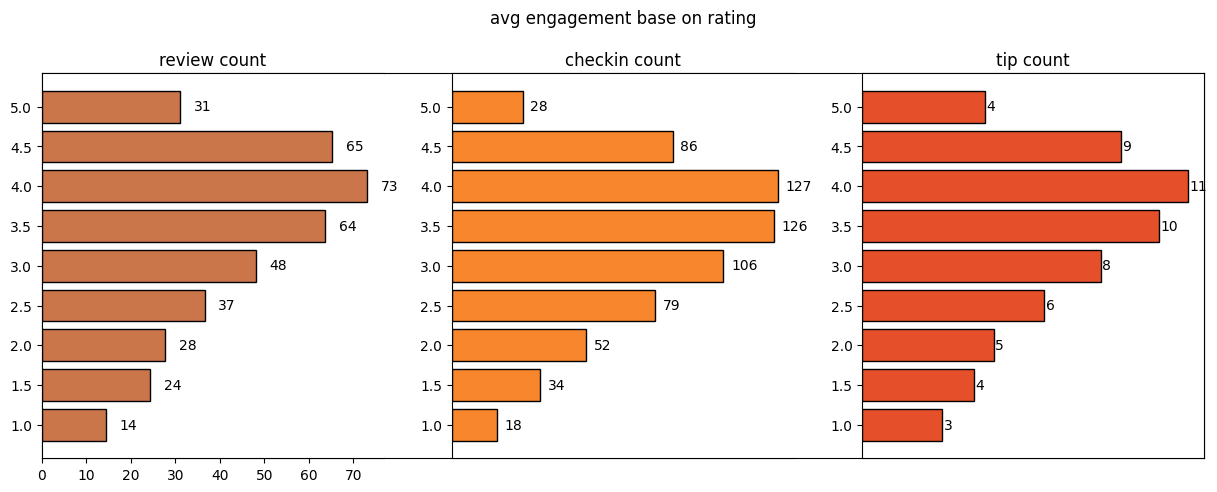

In [18]:
plt.figure(figsize=(15, 5))
plt.title('avg engagement base on rating\n\n')
plt.yticks([])
plt.xticks([])
plt.subplot(1, 3, 1)
plt.title('review count')
plt.barh(df['rating'].astype('str'), df['avg_review_count'], edgecolor = 'k', color = '#CB754B')
plt.gca().spines['right'].set_visible(False)
for i, value in enumerate(df['avg_review_count']):
    plt.text(value + 3, i, str(round(value)), color = 'black', va = 'center')

plt.subplot(1, 3, 2)
plt.title('checkin count')
plt.barh(df['rating'].astype('str'), df['avg_checkin_count'], edgecolor = 'k', color = '#F8862C')
plt.gca().spines['right'].set_visible(False)
for i, value in enumerate(df['avg_checkin_count']):
    plt.text(value + 3, i, str(round(value)), color = 'black', va = 'center')

plt.xticks([])
plt.subplot(1, 3, 3)
plt.title('tip count')
plt.barh(df['rating'].astype('str'), df['avg_tip_count'], edgecolor = 'k', color = '#E54F29')

for i, value in enumerate(df['avg_tip_count']):
    plt.text(value + 0.05, i, str(round(value)), color = 'black', va = 'center')
plt.xticks([])
plt.show()

#### **As we can see from 1 to 4 there is an increasing trend in rating, but after 4 this tends to decrease which means 4 is the threshold we need to maintain**

In [19]:
# check is there any relation between review count, checkin count and tip count for business
Query = f""" 
        select 
        B.business_id, 
        sum(B.review_count) as review_cnt, 
        avg(B.stars) as avg_rating,
        sum(T.tip_count) as tip_count,
        sum(length(C.date) - length(replace(C.date, ',', '')) + 1) as total_checkin
            
        from business B

left join
        checkin C
        on B.business_id = C.business_id 
left join
        (select 
        business_id,
        count(business_id) as tip_count from tip group by business_id order by tip_count) T 
        ON B.business_id = T.business_id
where B.business_id in {tuple(business_id['business_id'])}
group by B.business_id """



engagement_df = pd.read_sql_query(Query, conn)
engagement_df.dropna(inplace= True)

In [20]:
engagement_df[['review_cnt', 'total_checkin', 'tip_count']].corr()

,review_cnt,total_checkin,tip_count
review_cnt,1.000000,0.626884,0.766321
total_checkin,0.626884,1.000000,0.772088
tip_count,0.766321,0.772088,1.000000


#### **There is a very high correlation between review count, tip count and checkin count**

<Axes: >

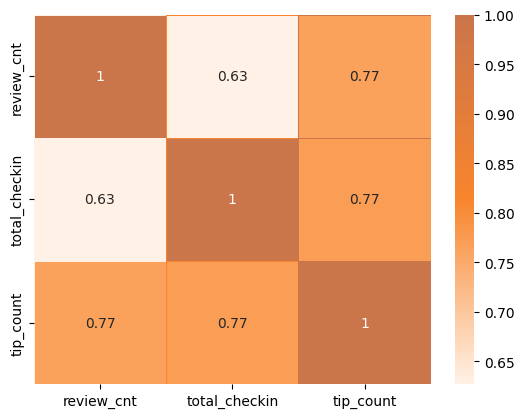

In [21]:
colors = ['#FFF1E5', '#F8852C', '#CB754B']
custom_cmap = LinearSegmentedColormap.from_list('mycmap', colors=colors)
sns.heatmap(engagement_df[['review_cnt', 'total_checkin', 'tip_count']].corr(), cmap=custom_cmap, annot=True,
            linewidths=0.5, linecolor= colors)

In [22]:
# Is there any difference in the user enagement (review, tips, checkin's) between high-rated (>= 3.5) and low-rated business (<3.5)

Query = f""" 
        select 
        B.business_id, 
        sum(B.review_count) as review_cnt, 
        avg(B.stars) as avg_rating,
        sum(T.tip_count) as tip_count,
        sum(length(C.date) - length(replace(C.date, ',', '')) + 1) as total_checkin,
        (case when B.stars >= 3.5 then 'High-rated' else 'Low-rated' end ) as category
        from business B

left join
        checkin C
        on B.business_id = C.business_id 
left join
        (select 
        business_id,
        count(business_id) as tip_count from tip group by business_id order by tip_count) T 
        ON B.business_id = T.business_id
where B.business_id in {tuple(business_id['business_id'])}
group by B.business_id """



engagement_df = pd.read_sql_query(Query, conn)
engagement_df.dropna(inplace= True)

In [23]:
engagement_df.groupby("category").agg({'review_cnt': ['mean'],
                                       'tip_count': ['mean'],
                                       'total_checkin': ['mean']})

,review_cnt,tip_count,total_checkin
,mean,mean,mean
category,,,
High-rated,72.291062,10.162766,122.066641
Low-rated,42.123420,6.541689,88.880828


#### **engagment in high rated restaurant's Engagement is high as compared to low rated restaurants**

In [24]:
# Function to calculate success score based on the avg rating and total review count

def calculate_success_metric(df):
    success_score = []
    for index, row in df.iterrows():
        score = row['avg_rating'] * np.log(row['review_count'] + 1)
        success_score.append(score)
    return success_score

In [25]:
# How does success metrics( avg_rating and review_count) of restaurants vary across different states and cities?

In [26]:
Query = f"""select 
            state, 
            city, 
            latitude, 
            longitude, 
            avg(stars) as avg_rating, 
            sum(review_count) as review_count,
            count(1) as restaurant_count
        from business 
        where business_id in {tuple(business_id['business_id'])} 
        group by state, city
        order by review_count desc, restaurant_count desc
        limit 10"""

city_df = pd.read_sql_query(Query, conn)

city_df['success'] = calculate_success_metric(city_df)
city_df

,state,city,latitude,longitude,avg_rating,review_count,restaurant_count,success
0,PA,Philadelphia,39.955505,-75.155564,3.532156,175487,3001,42.651934
1,FL,Tampa,27.890814,-82.502346,3.571429,104376,1715,41.270588
2,IN,Indianapolis,39.637133,-86.127217,3.412111,92639,1701,39.022521
3,AZ,Tucson,32.338572,-111.010760,3.386187,91613,1419,38.688341
4,TN,Nashville,36.208102,-86.768170,3.493590,87070,1404,39.737764
5,LA,New Orleans,29.963974,-90.042604,3.693676,69239,1012,41.167252
6,MO,Saint Louis,38.583223,-90.407187,3.414303,51490,811,37.042331
7,NV,Reno,39.476518,-119.784037,3.479626,48393,589,37.535187
8,AB,Edmonton,53.436403,-113.604288,3.509379,45916,1546,37.671748
9,ID,Boise,43.611192,-116.206275,3.558824,36104,561,37.346958


In [27]:
# create base map
m = folium.Map(location=[city_df['latitude'].mean(), city_df['longitude'].mean()], zoom_start=4)
#define color scale
color_scale = folium.LinearColormap(colors=['green', 'yellow', '#E54F29'],
                                    vmin = city_df['success'].min(),
                                    vmax = city_df['success'].max())
# add markers to the map

for index, row in city_df.iterrows():
    folium.CircleMarker(
        location= [row['latitude'], row['longitude']],
        radius= 5,
        colors = color_scale(row['success']),
        fill = True,
        fill_color = color_scale(row['success']),
        fill_opacity = 0.7,
        popup = f"""Success Score: {row['success']}"""

    ).add_to(m)

m.add_child(color_scale)


In [28]:
### Are there any parterns in user engagement over time for successfull business compared to less successful ones?
### Are there any seasonal trends in the user engagement for restaurants

Query = f""" select 
                review.month_yr,
                review_count,
                tip_count
            from 
            (select 
                strftime('%m-%Y', date) as month_yr,
                count(1) as review_count
            from review
            where business_id in {tuple(business_id['business_id'])} and stars >= 3.5
            group by month_yr
            order by month_yr ) review

            inner join 
            (select avg(b.stars), 
                strftime('%m-%Y', date) as month_yr,
                    count(1) as tip_count
            from tip t
            inner join business b
            on t.business_id = b.business_id
            where t.business_id in {tuple(business_id['business_id'])} and stars >= 3.5
            group by month_yr
            order by month_yr) business_tip
            on review.month_yr = business_tip.month_yr """
#display(pd.read_sql_query(Query, conn))
high_rated_engagement = pd.read_sql_query(Query, conn)
Query = f""" select 
                review.month_yr,
                review_count,
                tip_count
            from 
            (select 
                strftime('%m-%Y', date) as month_yr,
                count(1) as review_count
            from review
            where business_id in {tuple(business_id['business_id'])} and stars < 3.5
            group by month_yr
            order by month_yr ) review

            inner join 
            (select avg(b.stars), 
                strftime('%m-%Y', date) as month_yr,
                    count(1) as tip_count
            from tip t
            inner join business b
            on t.business_id = b.business_id
            where t.business_id in {tuple(business_id['business_id'])} and stars < 3.5
            group by month_yr
            order by month_yr) business_tip
            on review.month_yr = business_tip.month_yr """

#display(pd.read_sql_query(Query, conn))
low_rated_engagement = pd.read_sql_query(Query, conn)


In [29]:
high_rated_engagement

,month_yr,review_count,tip_count
0,01-2010,1218,79
1,01-2011,2171,621
2,01-2012,3086,1321
3,01-2013,3801,1230
4,01-2014,4973,1357
...,...,...,...
149,12-2017,10161,1477
150,12-2018,12870,1163
151,12-2019,13756,1161
152,12-2020,11294,937


In [30]:
low_rated_engagement

,month_yr,review_count,tip_count
0,01-2010,613,25
1,01-2011,1103,297
2,01-2012,1748,538
3,01-2013,2196,548
4,01-2014,2769,607
...,...,...,...
149,12-2017,5970,441
150,12-2018,7574,338
151,12-2019,7591,275
152,12-2020,5014,148


In [31]:
time_rating = pd.read_sql_query(f"""select strftime('%m-%Y', date) as month_yr, 
                                           avg(stars) as avg_rating
                                from review
                                where business_id in {tuple(business_id['business_id'])} 
                                group by month_yr
                                order by month_yr;""", con = conn)
time_rating

,month_yr,avg_rating
0,01-2006,4.000000
1,01-2007,3.897436
2,01-2008,3.603960
3,01-2009,3.690661
4,01-2010,3.724194
...,...,...
198,12-2017,3.613415
199,12-2018,3.608687
200,12-2019,3.665246
201,12-2020,3.833701


In [32]:
# convert time_month from str to datetime
# sort them by month year and get those yr > 2017
low_rated_engagement['month_yr'] = pd.to_datetime(low_rated_engagement['month_yr'])
low_rated_engagement.sort_values('month_yr', inplace=True)
low_rated_engagement = low_rated_engagement[low_rated_engagement['month_yr'] >= '2017']


high_rated_engagement['month_yr'] = pd.to_datetime(high_rated_engagement['month_yr'])
high_rated_engagement.sort_values('month_yr', inplace=True)
high_rated_engagement = high_rated_engagement[high_rated_engagement['month_yr'] >= '2017']


time_rating['month_yr'] = pd.to_datetime(time_rating['month_yr'])
time_rating.sort_values('month_yr', inplace=True)
time_rating = time_rating[time_rating['month_yr'] >= '2017']

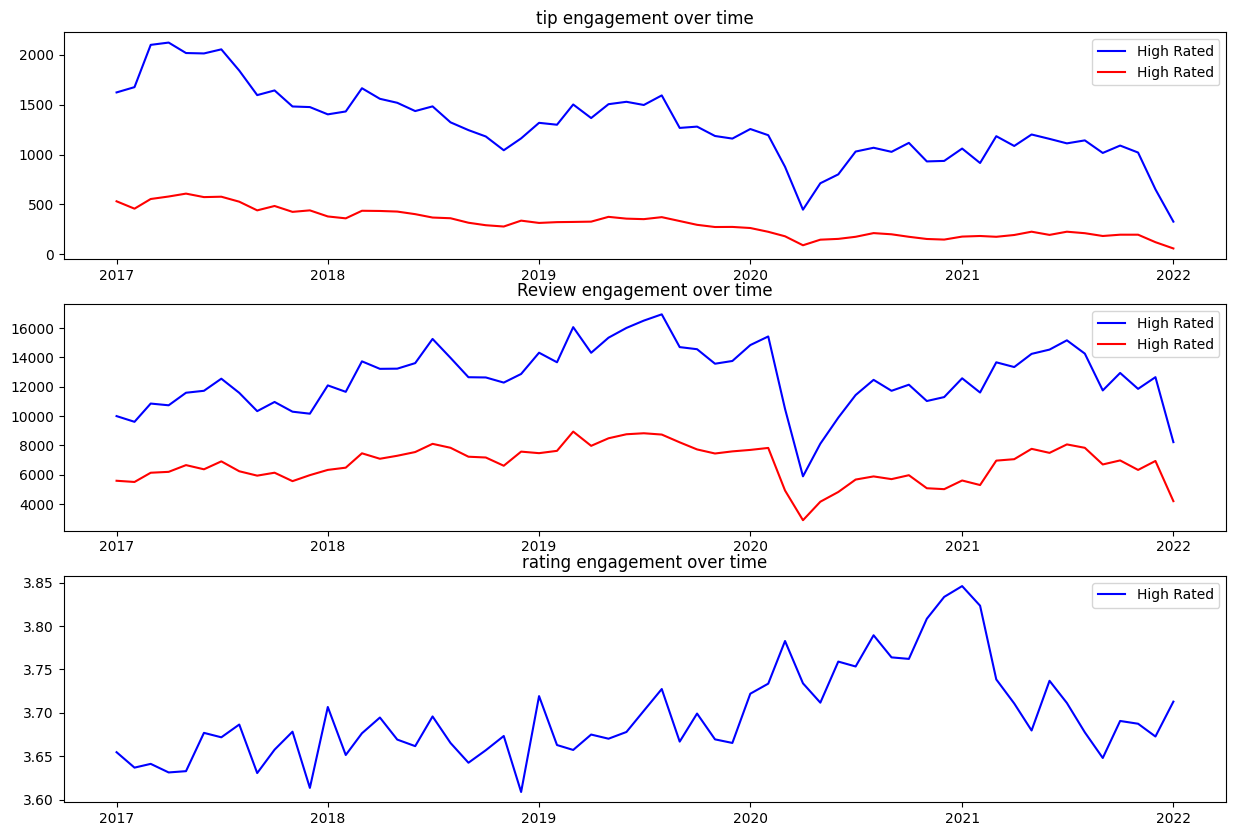

In [33]:

plt.figure(figsize = (15, 10))
plt.subplot(3, 1, 1)
plt.title('tip engagement over time')
plt.plot(high_rated_engagement['month_yr'], high_rated_engagement['tip_count'], label = 'High Rated', color = 'blue')
plt.plot(low_rated_engagement['month_yr'], low_rated_engagement['tip_count'], label = 'High Rated', color = 'red')
plt.legend()


plt.subplot(3, 1, 2)
plt.title('Review engagement over time')
plt.plot(high_rated_engagement['month_yr'], high_rated_engagement['review_count'], label = 'High Rated', color = 'blue')
plt.plot(low_rated_engagement['month_yr'], low_rated_engagement['review_count'], label = 'High Rated', color = 'red')
plt.legend()

plt.subplot(3, 1, 3)
plt.title('rating engagement over time')
plt.plot(time_rating['month_yr'], time_rating['avg_rating'], label = 'High Rated', color = 'blue')
plt.legend()

In [34]:
# Let's check how does seasonality works for high rated retaurants
# When we are checking timeseries data we have to index the time column and values in the series
tip_high_rated = high_rated_engagement[['month_yr', 'tip_count']].set_index('month_yr')

review_high_rated = high_rated_engagement[['month_yr', 'review_count']].set_index('month_yr')

rating_df = time_rating[['month_yr', 'avg_rating']].set_index('month_yr')

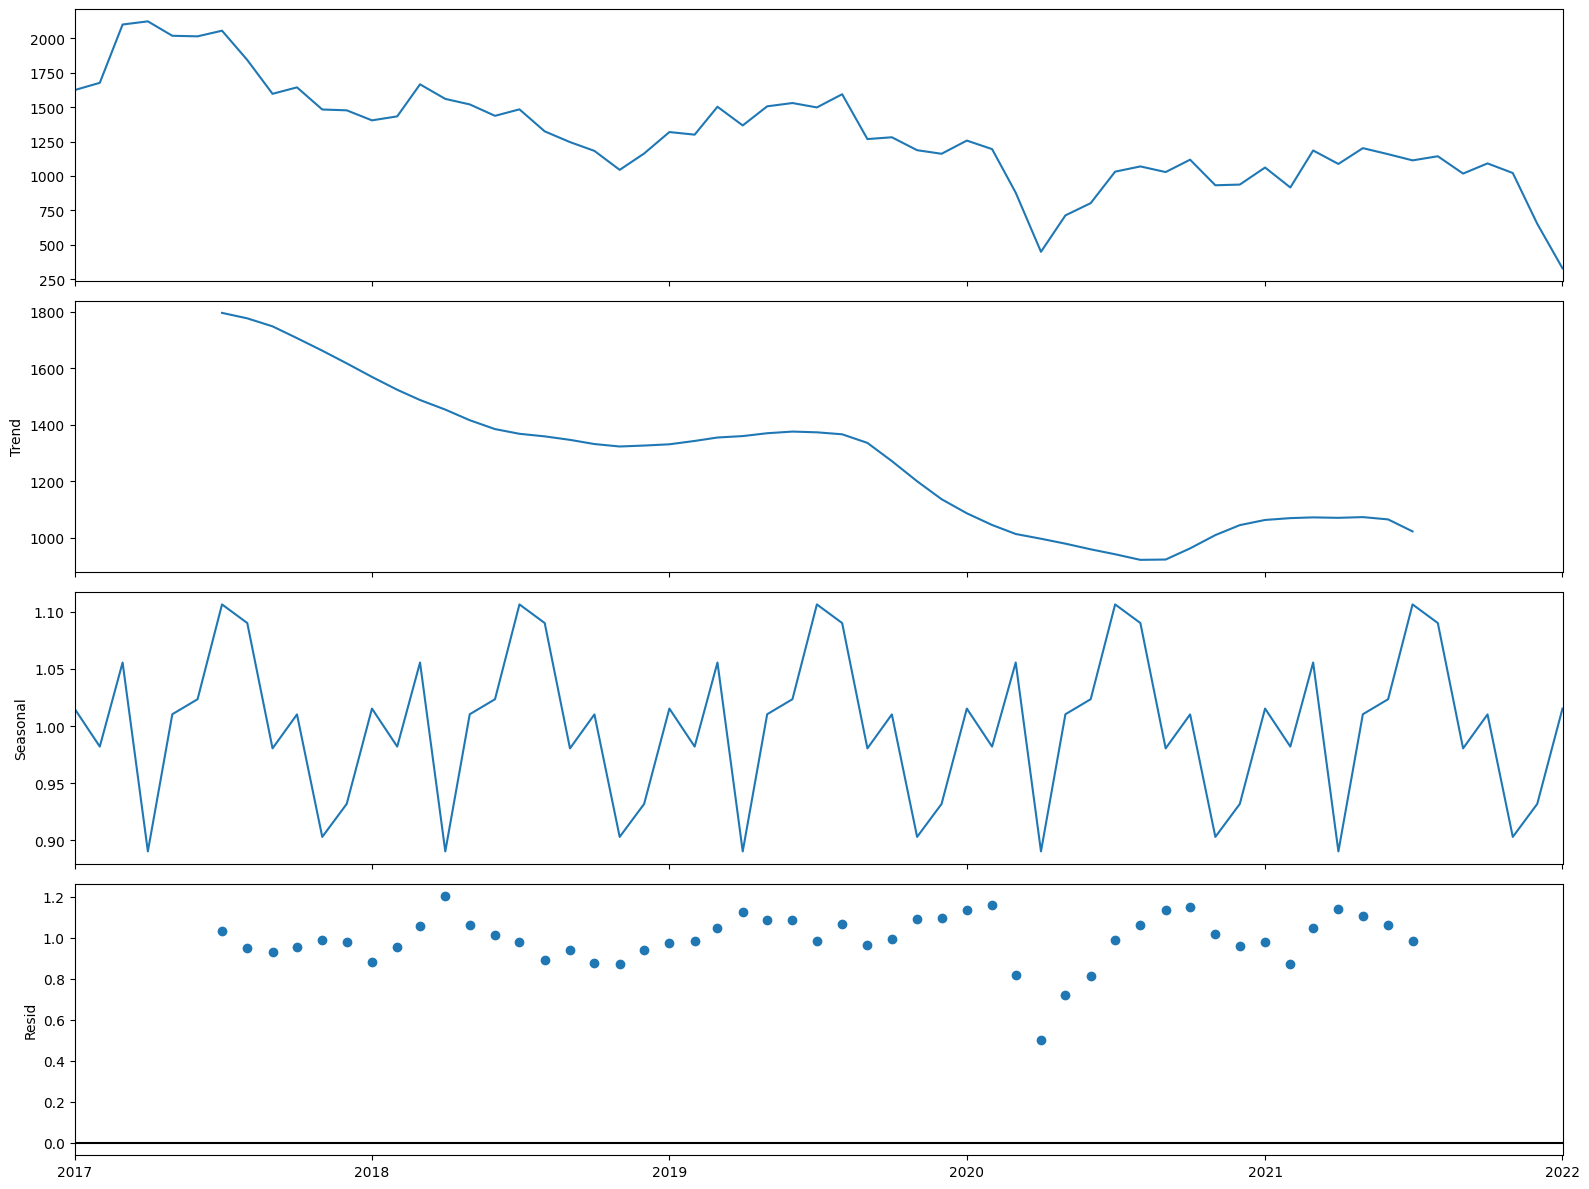

In [35]:

from statsmodels.tsa.seasonal import seasonal_decompose

multiplecative_decomposition = seasonal_decompose(tip_high_rated,
                                                  model = 'multiplicative',
                                                  period = 12)
plt.rcParams.update({'figure.figsize': (16, 12)})
multiplecative_decomposition.plot()
plt.show()

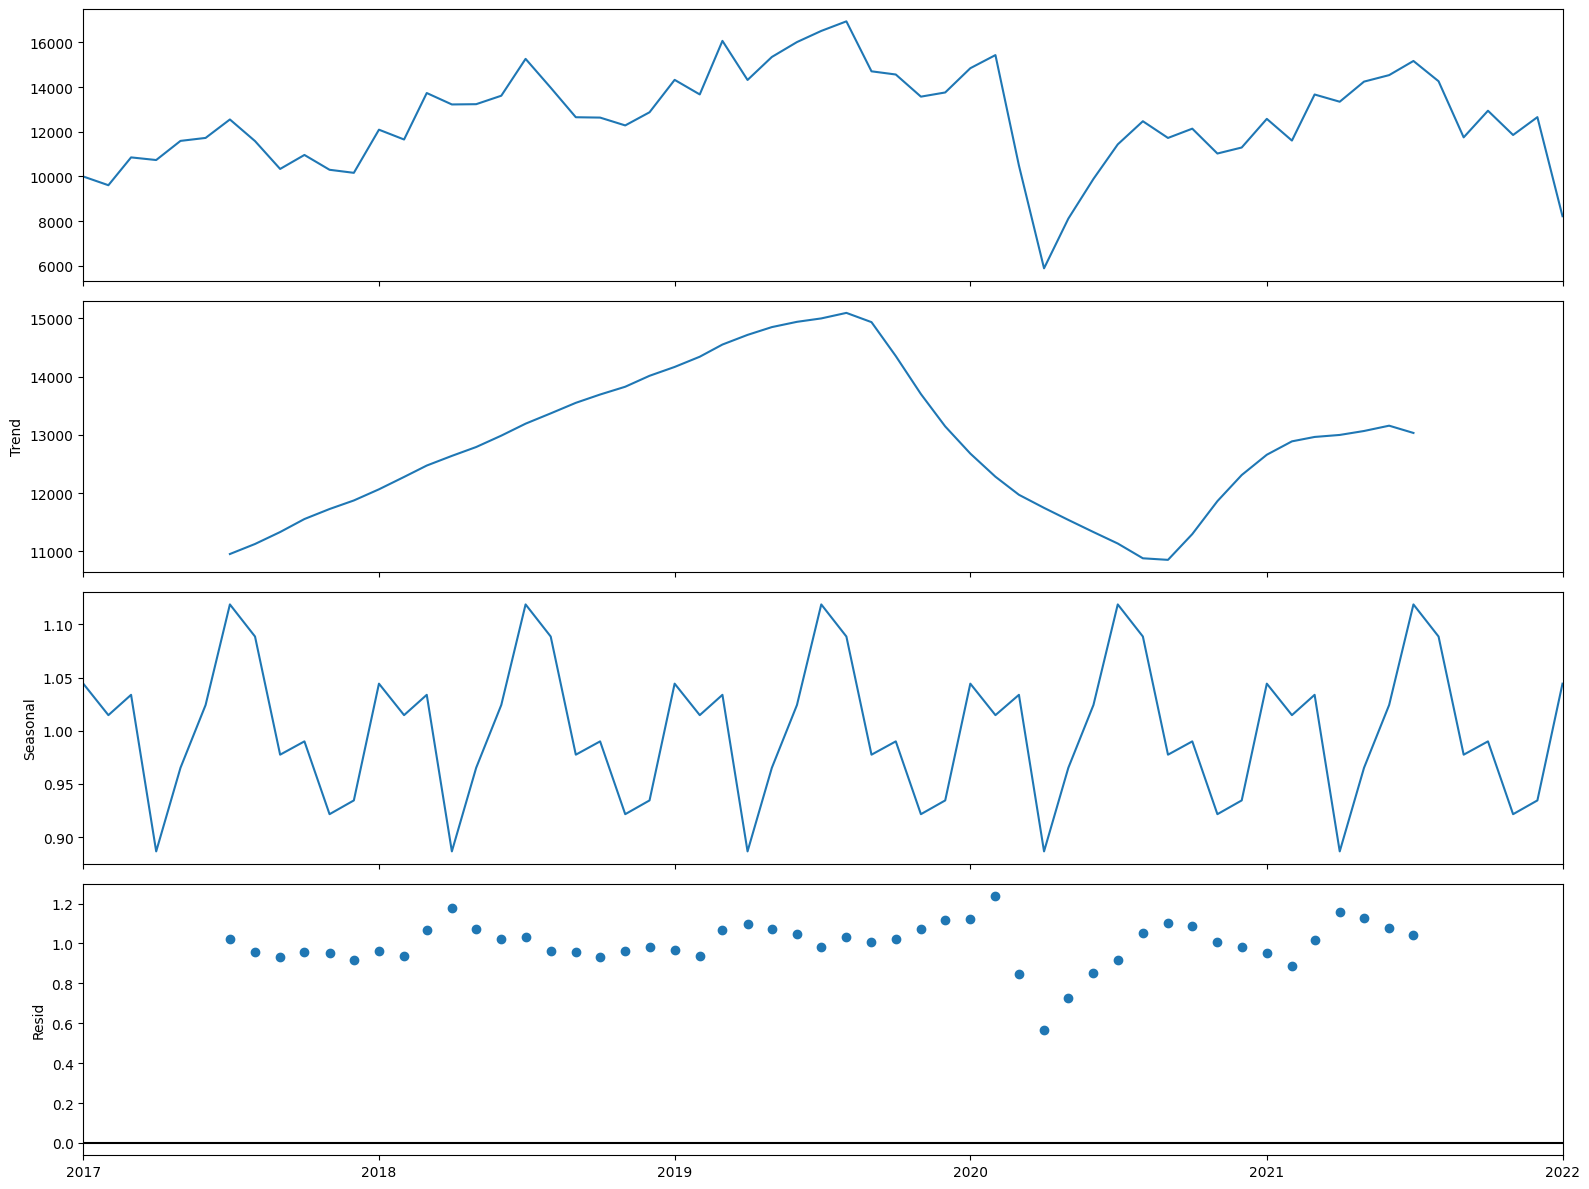

In [36]:
multiplecative_decomposition = seasonal_decompose(review_high_rated,
                                                  model = 'multiplicative',
                                                  period = 12)
plt.rcParams.update({'figure.figsize': (16, 12)})
multiplecative_decomposition.plot()
plt.show()

#### We can see there is a clear trend that tip and review count increases at the start and end of each year

In [37]:
query = f"""select
            b.business_id, 
            avg(b.stars) as avg_rating,
            sum(b.review_count) as review_count,
            sum(r.useful_count) as useful_count,
            sum(r.funny_count) as funny_count,
            sum(r.cool_count) as cool_count
            from
            (select business_id,
                sum(useful) as useful_count,
                sum(funny) as funny_count,
                sum(cool) as cool_count
            from review
            where business_id in {tuple(business_id['business_id'])}
            group by business_id ) r
            inner join
            business b 
            on r.business_id = b.business_id
            group by b.business_id
            order by review_count"""

sentiment_df = pd.read_sql_query(query, conn)
sentiment_df = remove_outlier(sentiment_df, 'useful_count')
sentiment_df = remove_outlier(sentiment_df, 'funny_count')
sentiment_df = remove_outlier(sentiment_df, 'cool_count')
sentiment_df

,business_id,avg_rating,review_count,useful_count,funny_count,cool_count
0,-2CPhK6ik9ZBgFX_F-dkxQ,2.0,5,3,5,3
1,-3ArWZfDjfab8qVHf3WVtg,4.0,5,18,3,2
2,-4lNMmoW7gRxkH0c2dfXfA,4.0,5,1,0,0
3,-7UDKbg_8TL4LVuYR6Ooyw,3.0,5,3,0,2
4,-AzaeuPwxqFO4SMSKjbuCw,3.0,5,5,0,0
...,...,...,...,...,...,...
31500,wXUg9bsJ9b4PS4pie8GVIA,4.0,246,145,25,54
31502,6DTwmhrbm9x-WO-A8Db9rQ,3.5,247,138,36,45
31518,5qmNrtr0iNyhCk6ky3c97w,3.0,248,179,37,21
31519,7dbUShu3yTUVNhTrdnF0FQ,4.0,248,58,16,27


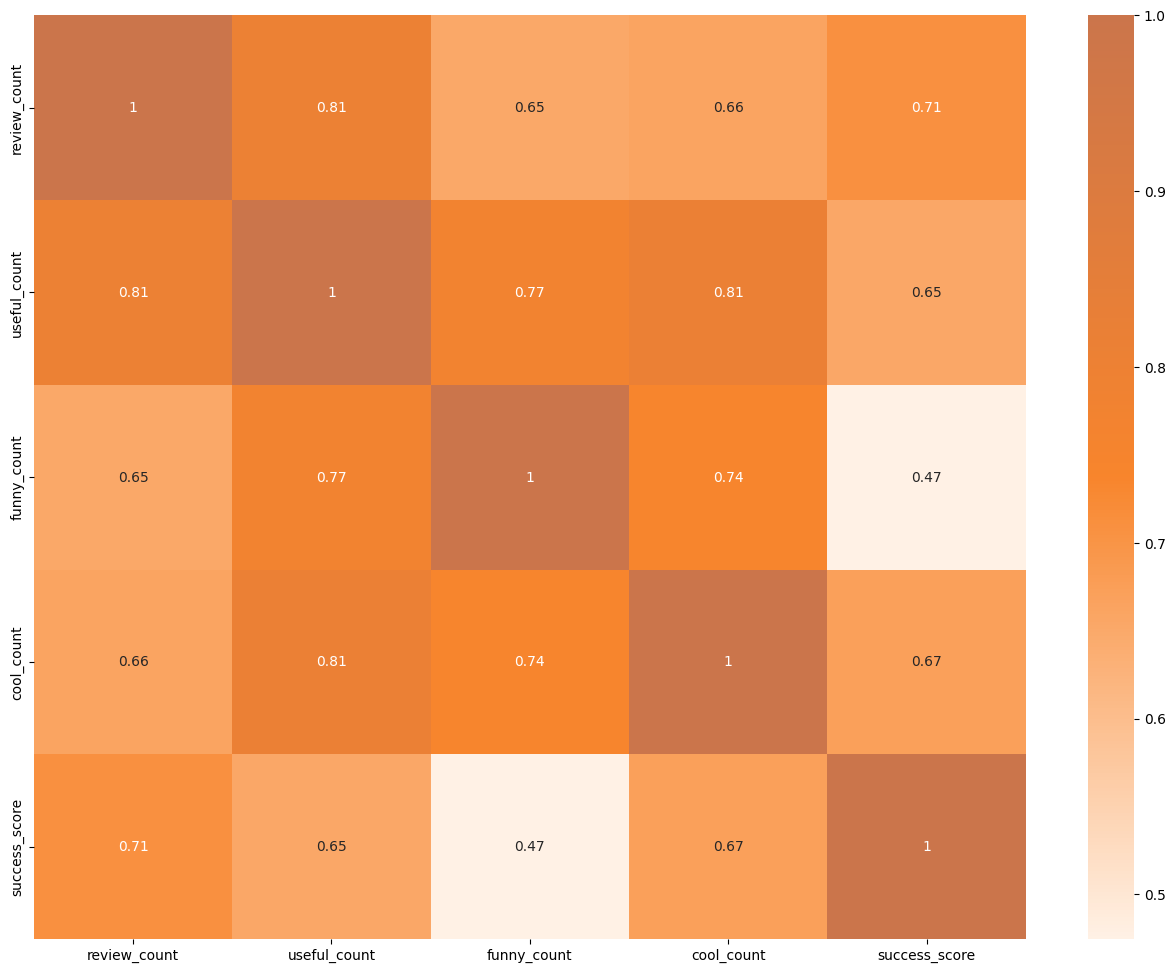

In [38]:
sentiment_df['success_score'] = calculate_success_metric(sentiment_df)
sns.heatmap(sentiment_df.iloc[:, 2:].corr(), cmap=custom_cmap, annot = True)
plt.show()

#### ***By the above heat map we can tell if useful count and cool count can increase success score***

In [39]:
# Is there any diff between engagement of elite and non elite users

elite_df = pd.read_sql_query(f"""select elite,
                            count(1) as num_users,
                            sum(review_count) as total_review_count
                    from
                    (select 
                        case when elite = '' then 'Not Elite' else 'Elite' END as elite,
                        review_count
                      
                    from user ) u
                    group by elite""", conn)

##### ***Even count of elite users is less but they have same amount of review count and non-elite users***

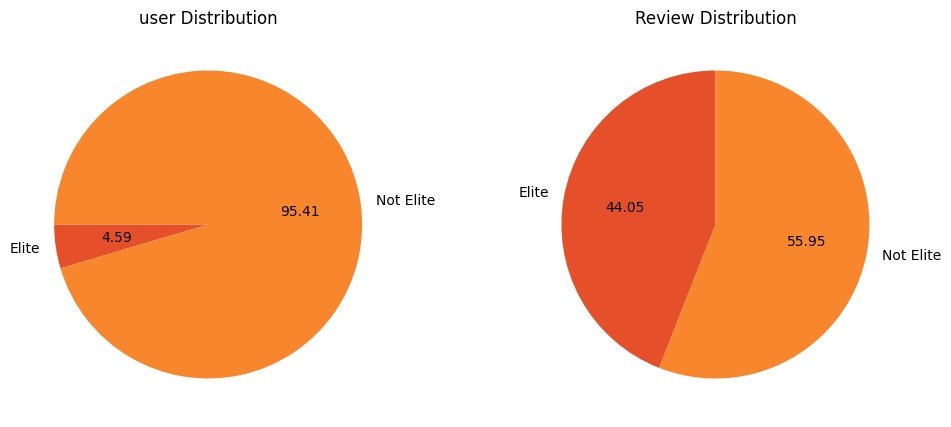

In [40]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
plt.title('user Distribution')
plt.pie(elite_df['num_users'], labels = elite_df['elite'], autopct='%.2f', startangle=180, colors= ['#E54F29', '#F8862C'])

plt.subplot(1, 2, 2)
plt.title('Review Distribution')
plt.pie(elite_df['total_review_count'], labels = elite_df['elite'], autopct='%.2f', startangle=90, colors= ['#E54F29', '#F8862C'])
plt.show()

##### ***Elite users are helpful in business, more the elite users more the reviews***

In [41]:
# What are the busiest hours for restaurants
# We have 3 diff tables with hour column (review, tip, checkin)
review_hour_df = pd.read_sql_query(f"""
                                    select hour,
                                           count(1) as cnt
                                    from
                                    (select
                                    cast(strftime('%H', date) as integer) as hour
                                 from review)
                                 group by hour""", con = conn)



tip_hour_df = pd.read_sql_query(f"""
                                    select hour,
                                           count(1) as cnt
                                    from
                                    (select
                                    cast(strftime('%H', date) as integer) as hour
                                 from tip)
                                 group by hour""", con = conn)


tip_hour_df, review_hour_df

(    hour    cnt
 0      0  74238
 1      1  67568
 2      2  54532
 3      3  40093
 4      4  27227
 5      5  16977
 6      6  10564
 7      7   6428
 8      8   4213
 9      9   3399
 10    10   4188
 11    11   7585
 12    12  13217
 13    13  20718
 14    14  27882
 15    15  36986
 16    16  51697
 17    17  62076
 18    18  63585
 19    19  60871
 20    20  57240
 21    21  58630
 22    22  65779
 23    23  73222,
     hour     cnt
 0      0  460765
 1      1  457189
 2      2  416472
 3      3  339935
 4      4  248771
 5      5  162636
 6      6  100730
 7      7   60031
 8      8   38078
 9      9   30389
 10    10   38146
 11    11   71627
 12    12  134914
 13    13  222809
 14    14  299955
 15    15  357945
 16    16  404843
 17    17  441397
 18    18  464488
 19    19  463727
 20    20  452524
 21    21  439319
 22    22  435185
 23    23  448405)

In [42]:
checkin = pd.read_sql_query("""select date from checkin""", conn)
checkin_hour = []
for i in checkin['date']:
    checkin_hour.extend([datetime.strptime(j.strip(), '%Y-%m-%d %H:%M:%S').strftime("%H") for j in i.split(',')])
checkin_hour_df = pd.DataFrame(checkin_hour).astype('int').groupby(0)[[0]].count()

checkin_hour_df

,0
0,
0,1155092
1,935985
2,669574
3,437035
4,264905
5,152476
6,85066
7,52295
8,35589


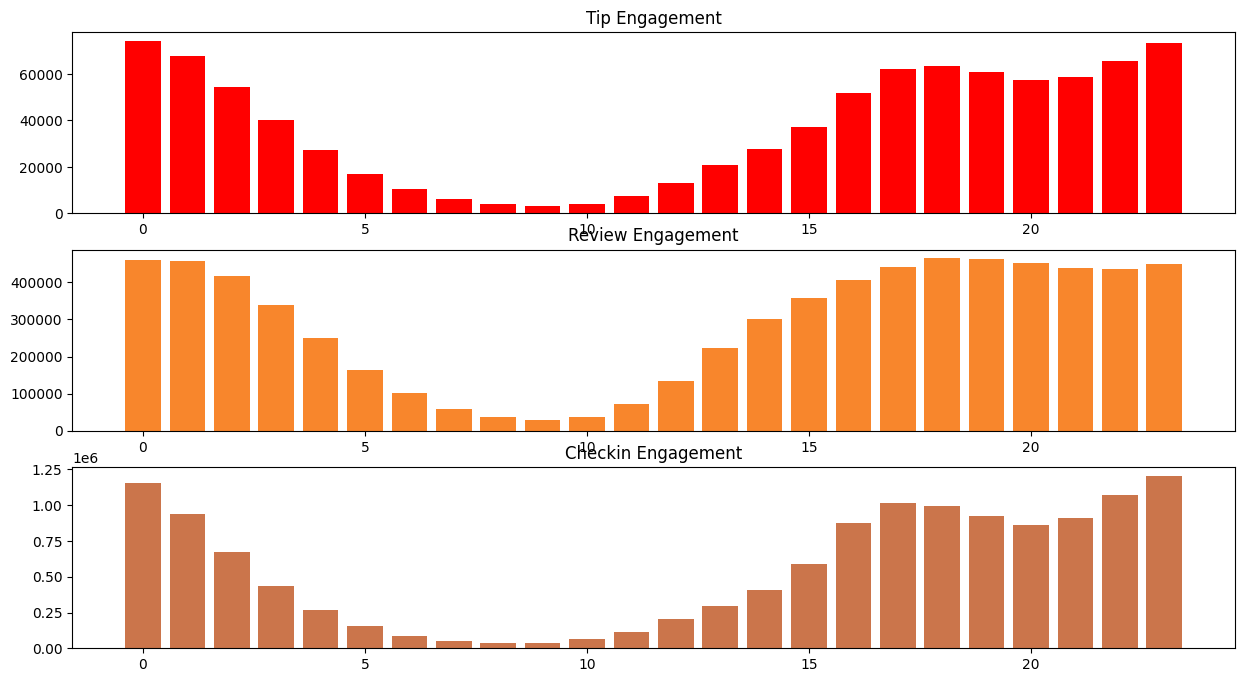

In [43]:
plt.figure(figsize=(15, 8))
plt.subplot(3, 1, 1)
plt.title('Tip Engagement')
plt.bar(tip_hour_df['hour'], tip_hour_df['cnt'], color = 'red')

plt.subplot(3, 1, 2)
plt.title('Review Engagement')
plt.bar(review_hour_df['hour'], review_hour_df['cnt'], color = '#F8862C')

plt.subplot(3, 1, 3)
plt.title('Checkin Engagement')
plt.bar(checkin_hour_df.index, checkin_hour_df[0], color = '#CB754B')
plt.show()

##### ***engagment starts increasing from 2 pm till 1 am then starts to decrease till 1 pm***